In [7]:
import magpylib as magpy
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.transform import Rotation as R

MagpylibBadUserInput: No sources provided
Sources must be either
- one of type ['Cuboid', 'Cylinder', 'CylinderSegment', 'Sphere', 'Tetrahedron', 'Triangle', 'TriangularMesh', 'Circle', 'Loop', 'Polyline', 'Line', 'CustomSource', 'Dipole']
- Collection with at least one of the above
- 1D list of the above
- string ['Cuboid', 'Cylinder', 'CylinderSegment', 'Sphere', 'Tetrahedron', 'Triangle', 'TriangularMesh', 'Circle', 'Loop', 'Polyline', 'Line', 'CustomSource', 'Dipole']
received array([[[-35.        , -35.        ,   0.        ],
        [-34.29292929, -35.        ,   0.        ],
        [-33.58585859, -35.        ,   0.        ],
        ...,
        [ 33.58585859, -35.        ,   0.        ],
        [ 34.29292929, -35.        ,   0.        ],
        [ 35.        , -35.        ,   0.        ]],

       [[-35.        , -34.29292929,   0.        ],
        [-34.29292929, -34.29292929,   0.        ],
        [-33.58585859, -34.29292929,   0.        ],
        ...,
        [ 33.58585859, -34.29292929,   0.        ],
        [ 34.29292929, -34.29292929,   0.        ],
        [ 35.        , -34.29292929,   0.        ]],

       [[-35.        , -33.58585859,   0.        ],
        [-34.29292929, -33.58585859,   0.        ],
        [-33.58585859, -33.58585859,   0.        ],
        ...,
        [ 33.58585859, -33.58585859,   0.        ],
        [ 34.29292929, -33.58585859,   0.        ],
        [ 35.        , -33.58585859,   0.        ]],

       ...,

       [[-35.        ,  33.58585859,   0.        ],
        [-34.29292929,  33.58585859,   0.        ],
        [-33.58585859,  33.58585859,   0.        ],
        ...,
        [ 33.58585859,  33.58585859,   0.        ],
        [ 34.29292929,  33.58585859,   0.        ],
        [ 35.        ,  33.58585859,   0.        ]],

       [[-35.        ,  34.29292929,   0.        ],
        [-34.29292929,  34.29292929,   0.        ],
        [-33.58585859,  34.29292929,   0.        ],
        ...,
        [ 33.58585859,  34.29292929,   0.        ],
        [ 34.29292929,  34.29292929,   0.        ],
        [ 35.        ,  34.29292929,   0.        ]],

       [[-35.        ,  35.        ,   0.        ],
        [-34.29292929,  35.        ,   0.        ],
        [-33.58585859,  35.        ,   0.        ],
        ...,
        [ 33.58585859,  35.        ,   0.        ],
        [ 34.29292929,  35.        ,   0.        ],
        [ 35.        ,  35.        ,   0.        ]]]) of type 'ndarray' instead.

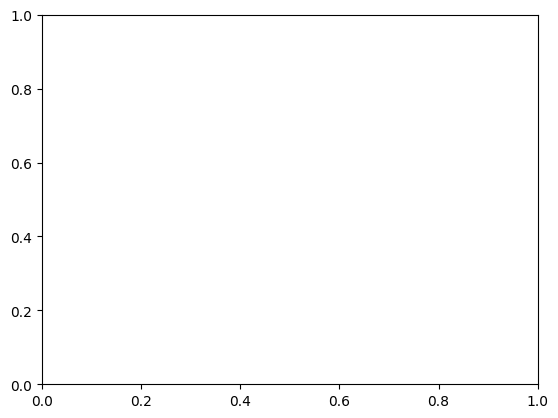

In [8]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Compute and plot field on x-y grid
grid = np.mgrid[-35:35:100j, -35:35:100j, 0:0:1j].T[0]
X, Y, _ = np.moveaxis(grid, 2, 0)

B = halbach.getB(grid)
Bx, By, _ = np.moveaxis(B, 2, 0)
Bamp = np.linalg.norm(B, axis=2)

pc = ax.contourf(X, Y, Bamp, levels=50, cmap="coolwarm")
ax.streamplot(X, Y, Bx, By, color="k", density=1.5, linewidth=1)

# Add colorbar
fig.colorbar(pc, ax=ax, label="|B|")

# Figure styling
ax.set(
    xlabel="x-position",
    ylabel="z-position",
    aspect=1,
)

plt.show()



In [ ]:

N = 8
angles = np.linspace(0, 360, N, endpoint=False)

halbach = magpy.Collection()


for a in angles:
    cube = magpy.magnet.Cuboid(
        dimension=(1,1,10),
        polarization=(1,0,0),
        position=(5,0,0),  style_magnetization = mystyle
    )
    cube.rotate_from_angax(a, 'z')
    cube.rotate_from_angax(-20, 'y',anchor = 0)
    cube.rotate_from_angax(a, 'z', anchor=0)
   
 
    halbach.add(cube)

halbach.show(backend='plotly')

In [9]:
x = np.linspace(0,200,100)
hal_fieldx = []
hal_fieldy = []
hal_fieldz = []
x_p = []
for i in x:
    h = halbach.getB([0,0,i])
    #if h[0]  > 0:
    x_p.append(i)
    hal_fieldx.append(h[0])
    hal_fieldy.append(h[1])
    hal_fieldz.append(h[2])
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(x_p,np.array(hal_fieldx)*1e3)
ax[0].set_title('Bx')
ax[0].set_xlabel('z(mm)')
ax[0].set_ylabel('Bx(mT)')
ax[1].plot(x_p,np.array(hal_fieldy)*1e3)
ax[1].set_title('By')
ax[1].set_xlabel('z(mm)')
ax[1].set_ylabel('By(mT)')
ax[2].plot(x_p,np.array(hal_fieldz)*1e3)
ax[2].set_title('Bz')
ax[2].set_xlabel('z(mm)')
ax[2].set_ylabel('$B_z$(mT)')
plt.tight_layout()
plt.show()

MagpylibBadUserInput: No sources provided
Sources must be either
- one of type ['Cuboid', 'Cylinder', 'CylinderSegment', 'Sphere', 'Tetrahedron', 'Triangle', 'TriangularMesh', 'Circle', 'Loop', 'Polyline', 'Line', 'CustomSource', 'Dipole']
- Collection with at least one of the above
- 1D list of the above
- string ['Cuboid', 'Cylinder', 'CylinderSegment', 'Sphere', 'Tetrahedron', 'Triangle', 'TriangularMesh', 'Circle', 'Loop', 'Polyline', 'Line', 'CustomSource', 'Dipole']
received [0, 0, 0.0] of type 'list' instead.

In [49]:
zeeman_prof = magpy.Collection()
n = 5
l =[-24,24,24,-24,24]
ll = ['y','x','y','x','y']
j = 0
angles = np.linspace(0, 360, n, endpoint=False) 
for i in angles:
    cube1= magpy.magnet.Cuboid(
    dimension=(6,6,128),
    polarization=(0,-1.08,0),
    position=(40,1,0))
    cube1.rotate_from_angax(i, 'z', anchor=0)
    cube1.rotate_from_angax(i, 'z')
    cube1.rotate_from_angax(l[j], ll[j],anchor = 0)
    zeeman_prof.add(cube1)
    j = j+1
magpy.show(zeeman_prof, backend='plotly')  

In [116]:
zeeman_prof = magpy.Collection()
j = 0
n = 1
a = 30
an1 = 9.6
an2 = 24
l =[-an1,an1,an1,-an1]
l2 = [-an2,an2,an2,-an2]
ll = ['y','x','y','x']
mystyle = mstyle = dict(
    mode="color+arrow",
    color=dict(north="magenta", middle="white", south="turquoise"),
    arrow=dict(width=2, color="k")
)

angles = np.linspace(0, 360, n, endpoint=False)
for i in angles:
    cube1= magpy.magnet.Cuboid(
    dimension=(6,6,128),
    polarization=((1.080)*1e3,0,0),
    position=(70+a,0,0),
    style_magnetization = mystyle)
    cube2 = magpy.magnet.Cuboid(dimension= (4,4,25),
    polarization=(1.17*1e3,0,0),
    position=(70+a,0,-80),)
    cube3= magpy.magnet.Cuboid(
    dimension=(6,6,128),
    polarization=(-1.08*1e3,0,0),
    position=(130+a,0,200),
  )
    cube4 = magpy.magnet.Cuboid(dimension= (4,4,25),
    polarization=(-1.17*1e3,0,0),
    position=(140+a,0,40+94),
    )
    cube5 = magpy.magnet.Cuboid(dimension= (4,4,25),
    polarization=(1.17*1e3,0,0),
    position=(20+a,0,235+94))
   # style_magnetization = mystyle)
    cube6 = magpy.magnet.Cuboid(dimension= (4,4,25),
    polarization=(1.17*1e3,0,0),
    position=(100+a,0,2+94),)
    #style_magnetization = mystyle
    cube1.rotate_from_angax(i, 'z', anchor=0)
    cube1.rotate_from_angax(9.6, 'y',anchor = 0)
    cube1.rotate_from_angax(i, 'z')
    cube2.rotate_from_angax(i, 'z')
    cube2.rotate_from_angax(i, 'z')
    cube3.rotate_from_angax(i, 'z', anchor=0)
    cube3.rotate_from_angax(-24, 'y')
    cube3.rotate_from_angax(i, 'z')
  
    cube4.rotate_from_angax(i, 'z', anchor=0)
    cube4.rotate_from_angax(i, 'z')
    cube5.rotate_from_angax(i, 'z', anchor=0)
    cube5.rotate_from_angax(i, 'z')
    cube6.rotate_from_angax(i, 'z', anchor=0)
    cube6.rotate_from_angax(i, 'z')

    zeeman_prof.add(cube1)
    zeeman_prof.add(cube2)
    zeeman_prof.add(cube3)
    zeeman_prof.add(cube4)
    zeeman_prof.add(cube5)
    zeeman_prof.add(cube6)
    j = j+1
sens = magpy.Sensor([(0,0,0),(0,0,250)])
magpy.show(zeeman_prof)



In [64]:
zeeman_prof_x = magpy.Collection()
j = 0
n = 4
#a = 30
l =[-an1,an1,an1,-an1]
l2 = [-an2,an2,an2,-an2]
ll = ['y','x','y','x']
angles = np.linspace(0, 360, n, endpoint=False)
for i in angles:
    cube1= magpy.magnet.Cuboid(
    dimension=(6,6,128),
    polarization=(1.080,0,0),
    position=(70+a,0,0),
    style_magnetization = mystyle)
    cube2 = magpy.magnet.Cuboid(dimension= (4,4,25),
    polarization=(1.17*1e3,0,0),
    position=(70+a,0,-50))
    cube3= magpy.magnet.Cuboid(
    dimension=(6,6,128),
    polarization=(1.08*1e3,0,0),
    position=(140+a,0,264.6650415192161)
   )
    cube4 = magpy.magnet.Cuboid(dimension= (4,4,25),
    polarization=(1.17*1e3,0,0),
    position=(20+a,0,140+94) )
    cube5 = magpy.magnet.Cuboid(dimension= (4,4,25),
    polarization=(1.17*1e3,0,0),
    position=(20+a,0,235+94)
  )
    cube6 = magpy.magnet.Cuboid(dimension= (4,4,25),
    polarization=(1.08*1e3,0,0),
    position= (10+a,0,260+94)
 )
    cube1.rotate_from_angax(i, 'z', anchor=0)
    cube1.rotate_from_angax(i, 'z')
    cube1.rotate_from_angax(l[j], ll[j],anchor=0)
    cube2.rotate_from_angax(i, 'z', anchor=0)
    cube2.rotate_from_angax(i, 'z')
    cube3.rotate_from_angax(i, 'z', anchor=0)
    cube3.rotate_from_angax(i, 'z')
    cube3.rotate_from_angax(l2[j], ll[j],anchor = 0)
    cube4.rotate_from_angax(i, 'z', anchor=0)
    cube4.rotate_from_angax(i, 'z')
    cube5.rotate_from_angax(i, 'z', anchor=0)
    cube5.rotate_from_angax(i, 'z')
    cube6.rotate_from_angax(i, 'z', anchor=0)
    cube6.rotate_from_angax(i, 'z')

    zeeman_prof_x.add(cube1)
    zeeman_prof_x.add(cube2)
    zeeman_prof_x.add(cube3)
    zeeman_prof_x.add(cube4)
    zeeman_prof_x.add(cube5)
    zeeman_prof_x.add(cube6)
    j = j+1
sens = magpy.Sensor([(0,0,0),(0,0,250)])
zeeman_prof_x.rotate_from_angax(45, 'z')
magpy.show(zeeman_prof_x,zeeman_prof, backend='plotly')

Text(0, 0.5, 'mT')

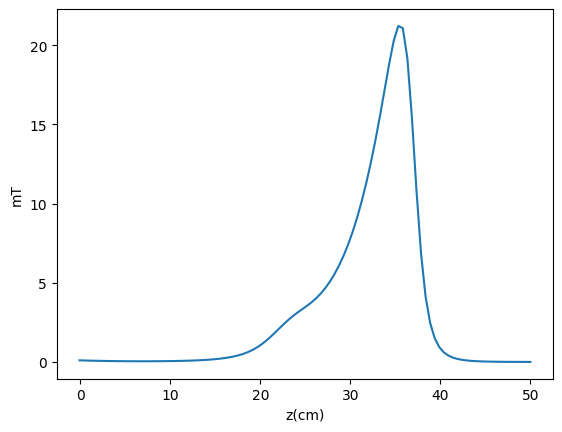

In [43]:
z = np.linspace(-1,500,100)
b_z = []
b_x = []
b_y = []
for i in z:
    b_z.append(zeeman_prof.getB([0,0,i])[1]+zeeman_prof_x.getB([0,0,i])[1])

    
plt.plot(z/1e1,b_z)
plt.xlabel('z(cm)')
plt.ylabel('mT')